<a href="https://colab.research.google.com/github/brunoras/dom_casmurro/blob/main/Uma_poderosa_an%C3%A1lise_de_relacionamento_das_personagens_de_Dom_Casmurro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma poderosa análise de relacionamento das personagens de Dom Casmurro

Reconhecer nomes de pessoas, locais, organizações em textos, principalmente quando temos texto longos ou muitos textos, é uma tarefa valiosa, pois com essa informação podemos fazer análises como feedback, recomendações, resumos, etc.

Identificando nomes de pessoas dentro de uma história, conseguimos fazer relações de proximidade entre os personagens, determinando quem tem mais amigos ou quem tem uma rede de contatos maior, por exemplo. Até mesmo podemos agrupar os personagens em comunidades, separadas pelo grau de comunicação entre as entidades.

Iremos fazer exatamente isto com a obra Dom Casmurro de Machado de Assis.

## Personagens

* **Bento Santiago (Bentinho)**: protagonista e narrador da história.
* **Capitolina (Capitú)**: vizinha e grande amor de Bento.
* **D. Glória**: mãe de Bento.
* **Pedro de Albuquerque Santiago**: pai falecido de Bento.
* **José Dias**: médico agregado na casa de Dona Glória.
* **Cosme**: tio de Bento, advogado e irmão de Dona Glória.
* **Justina**: prima de Dona Glória.
* **Senhor Pádua**: pai de Capitu.
* **D. Fortunata**: mãe de Capitu.
* **Escobar**: melhor amigo de Bento no seminário.
* **Sancha**: amiga de Capitu e mulher de Escobar.
* **Ezequiel**: filho de Bento e Capitu.
* **Padre Cabral**: quem encontra a solução para o caso de Bentinho.

In [ ]:
personagens = ['Bentinho', 'Capitú', 'D. Gloria', 'Pedro',
               'José Dias', 'Cosme', 'Justina', 'Padua',
               'D. Fortunata', 'Escobar', 'Sancha',
               'Ezequiel', 'Cabral']

## Importações

In [ ]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

import os
from pyvis.network import Network
import community.community_louvain as community_louvain

In [ ]:
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.0 MB 3.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
# Carregando o modelo do Spacy em pt-br
NER = spacy.load('pt_core_news_sm')

## Named Entity Recognition (NER)

In [ ]:
dir = "/content/drive/MyDrive/Projeto Casmurro/"

In [ ]:
livro = [l for l in os.scandir(dir) if '.txt' in l.name]
livro_txt = open(livro[0]).read()

O NER é uma ferramenta para rotular objetos do "mundo real", como pessoas, companhias ou lugares.

In [ ]:
livro_doc = NER(livro_txt)

In [ ]:
displacy.render(livro_doc[0:2000], style='ent', jupyter=True)

In [ ]:
sent_entity_df = []

# Iterando por cada sentença e armazenando o NER para cada sentença
for sent in livro_doc.sents:
  entity_list = [ent.text for ent in sent.ents]
  sent_entity_df.append({"paragrafo": sent, "entidades": entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [ ]:
# pd.set_option('display.max_rows', None)
sent_entity_df

,paragrafo,entidades
0,"(﻿I, \n\n, Do, titulo, .)",[]
1,(\n\n),[]
2,"(Uma, noite, destas, ,, vindo, da, cidade, par...","[Engenho Novo, Central, Bentinho]"
3,"(Comprimentou-me, ,, sentou-se, ao, pé, de, mi...",[lua]
4,"(A, viagem, era, curta, ,, e, os, \n, versos, ...",[]
...,...,...
5029,"(se, te, lembras, bem, da, Capitú, menina, ,, ...",[Capitú]
5030,"(\n\n, E, bem, ,, qualquer, que, seja, a, solu...",[]
5031,"(A, terra, lhes, seja, \n, leve, !)",[]
5032,"(Vamos, á, _, Historia, dos, suburbios, .)","[Vamos, Historia]"


In [ ]:
# criando uma função para filtrar o df por personagens
def filtro_entidade(ent_list, char):
  return [ent for ent in ent_list
          if ent in char]

In [ ]:
sent_entity_df['personagens'] = sent_entity_df['entidades'].apply(lambda x: filtro_entidade(x, personagens))

# filtrando sentenças sem personagens
sent_entity_df_filt = sent_entity_df[sent_entity_df['personagens'].map(len) > 0]
sent_entity_df_filt

,paragrafo,entidades,personagens
2,"(Uma, noite, destas, ,, vindo, da, cidade, par...","[Engenho Novo, Central, Bentinho]",[Bentinho]
79,"(A, casa, era, a, da, rua, de, Matacavallos, ,...","[Bentinho, amam, anno]",[Bentinho]
81,"(D., Gloria, ,, a, senhora, persiste, na, idei...",[Bentinho],[Bentinho]
86,"(José, Dias, ,, depois, de, alguns, instantes,...","[José Dias, Padua]","[José Dias, Padua]"
89,"(Não, \n, me, parece, bonito, que, o, nosso, B...",[Bentinho],[Bentinho]
...,...,...,...
4994,"(Onze, mezes, depois, ,, Ezequiel, morreu, de,...","[Ezequiel, Jerusalem, Ezequiel]","[Ezequiel, Ezequiel]"
5013,"(eu, (, Bentinho, ), é, que, ia, buscar, um, \...","[Bentinho, Levas]",[Bentinho]
5017,"(eu, (, Bentinho, ), ficava, á, porta, ,, espe...",[Bentinho],[Bentinho]
5023,"(O, resto, é, saber, se, a, Capitú, da, praia,...","[Capitú, Gloria, Matacavallos]",[Capitú]


## Criando Relacionamentos

Aqui iremos criar uma janela de busca com alguns parágrafos e procurar por nomes de personagens dentro da janela.

In [ ]:
janela = 5
relacionamentos = []

for i in range(sent_entity_df.index[-1]):
  end_i = min(i+janela, sent_entity_df.index[-1])
  char_list = sum((sent_entity_df_filt.loc[i: end_i].personagens), [])

  # removendo relações consigo mesmo
  char_unique = [char_list[i] for i in range(len(char_list))
                 if (i==0) or char_list[i] != char_list[i-1]]
  
  # criando uma ideia de fonte e alvo, onde a fonte é quem é referenciado primeiro na sentença e o alvo é quem vem em seguida.
  # ex. [Bentinho, Capitú, Escobar, Ezequiel]:
  # Bentinho -> Capitú; Capitú -> Escobar; Escobar -> Ezequiel
  if len(char_unique) > 1:
    for idx, a in enumerate(char_unique[:-1]):
      b = char_unique[idx + 1]
      relacionamentos.append({"fonte": a, "alvo": b})

relacionamentos_df = pd.DataFrame(relacionamentos)

In [ ]:
relacionamentos_df = pd.DataFrame(np.sort(relacionamentos_df.values, axis = 1), columns = relacionamentos_df.columns)
relacionamentos_df['valor'] = 1
relacionamentos_df = relacionamentos_df.groupby(['fonte', 'alvo'], sort=False, as_index=False).sum()
relacionamentos_df.head(10)

,fonte,alvo,valor
0,Bentinho,José Dias,144
1,José Dias,Padua,52
2,Bentinho,Padua,23
3,Bentinho,Capitú,408
4,Capitú,Padua,20
5,Cosme,Justina,24
6,José Dias,Justina,84
7,Cosme,José Dias,27
8,Bentinho,Cosme,5
9,Capitú,José Dias,91


## Análise Gráfica

In [ ]:
# Criando um gráfico a partir de um dataframe

G = nx.from_pandas_edgelist(relacionamentos_df,
                            source = 'fonte',
                            target = 'alvo',
                            edge_attr = 'valor',
                            create_using = nx.Graph())

### Visualização com o Pyvis

In [ ]:
net = Network(notebook = True,
              width = '1000px',
              height = '700px',
              bgcolor = '#222222',
              font_color = 'white')

# O grau é a quantidade de setas que saem de uma bolota no gráfico
# Com isso o gráfico fica mais visível qual personagem tem mais relevância 
grau_nos = dict(G.degree)
nx.set_node_attributes(G, grau_nos, 'size')

net.from_nx(G)
net.show(dir+'casmurro.html')

### Personagens mais importantes

Graus de centralidade:

* Nós com mais graus são mais importantes;

* Quem conhece mais gente.

<Figure size 1440x1440 with 0 Axes>

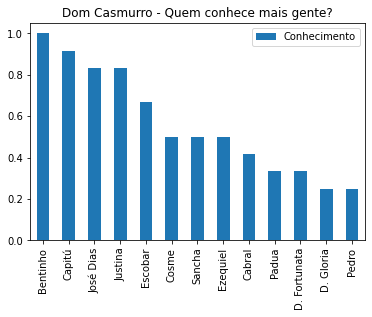

In [ ]:
grau_dict = nx.degree_centrality(G)
grau_df = pd.DataFrame.from_dict(grau_dict, orient='index', columns=['Conhecimento'])

# Plotando 
plt.figure(figsize=(20, 20))
grau_df.sort_values('Conhecimento', ascending=False).plot(kind='bar')
plt.title('Dom Casmurro - Quem conhece mais gente?')
plt.savefig(dir+'conhece.png', bbox_inches='tight')
plt.show()

Centralidade por ponte:

* Quão frequente um nó serve de ponte de ligação entre outros nós;

* Quem conecta grupos de amigos com outros grupos

<Figure size 1440x1440 with 0 Axes>

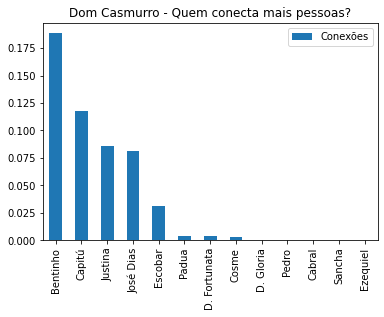

In [ ]:
prox_dict = nx.betweenness_centrality(G)
prox_df = pd.DataFrame.from_dict(prox_dict, orient='index', columns=['Conexões'])

# Plotando 
plt.figure(figsize=(20, 20))
prox_df.sort_values('Conexões', ascending=False).plot(kind='bar')
plt.title('Dom Casmurro - Quem conecta mais pessoas?')
plt.savefig(dir+'conecta.png', bbox_inches='tight')
plt.show()

Centralidade de aproximação:

* Quanto demora para uma informação saída de um nó chegar a todos os outros nós;

* Quem é mais influente.

<Figure size 1440x1440 with 0 Axes>

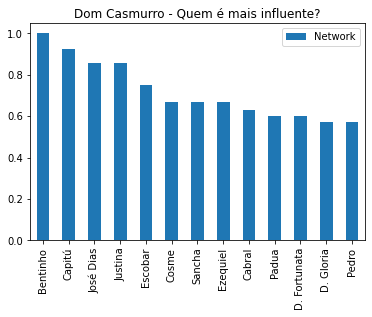

In [ ]:
close_dict = nx.closeness_centrality(G)
close_df = pd.DataFrame.from_dict(close_dict, orient='index', columns=['Network'])

# Plotando 
plt.figure(figsize=(20, 20))
close_df.sort_values('Network', ascending=False).plot(kind='bar')
plt.title('Dom Casmurro - Quem é mais influente?')
plt.savefig(dir+'influencia.png', bbox_inches='tight')
plt.show()

## Detecção de comunidades

In [ ]:
comunidades = community_louvain.best_partition(G)
comunidades

{'Bentinho': 2,
 'Cabral': 0,
 'Capitú': 2,
 'Cosme': 0,
 'D. Fortunata': 2,
 'D. Gloria': 2,
 'Escobar': 1,
 'Ezequiel': 1,
 'José Dias': 0,
 'Justina': 1,
 'Padua': 2,
 'Pedro': 1,
 'Sancha': 1}

In [ ]:
com_net = Network(notebook = True,
                  width = '1000px',
                  height = '700px',
                  bgcolor = '#222222',
                  font_color = 'white')

nx.set_node_attributes(G, comunidades, 'group')

com_net.from_nx(G)
com_net.show(dir+'comunidades_casmurro.html')

In [ ]:
from IPython.display import IFrame
IFrame(src=dir+'comunidades_casmurro.html', width=900, height=600)